<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo4/blob/master/Copia_de_Clase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 46.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/9d/f9/0e/a8de3e98e64bbf828f5e762936ff5a40e72331dbe663470711
Successfully built scikit-fuzzy


75.00215141386592


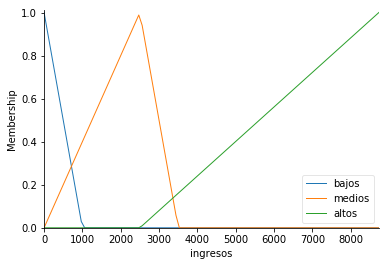

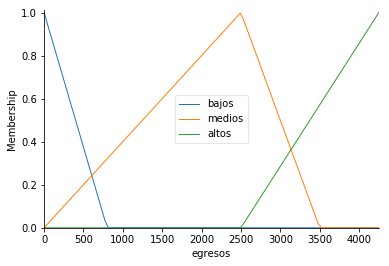

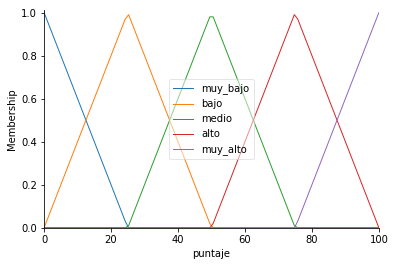

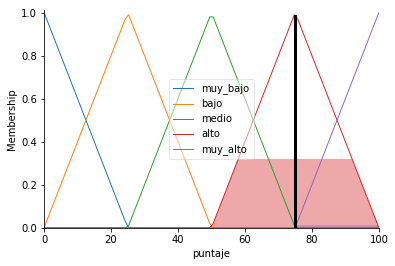

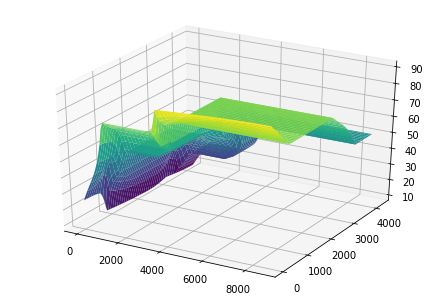

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as fis
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

ingresos = fis.Antecedent(np.linspace(0,8737,100),'ingresos')
egresos = fis.Antecedent(np.linspace(0,4252,100),'egresos')

puntaje = fis.Consequent(np.linspace(0,100,100),'puntaje')

ingresos['bajos'] = fuzz.trimf(ingresos.universe,[0,0,1000])
ingresos['medios'] = fuzz.trimf(ingresos.universe,[0,2500,3500])
ingresos['altos'] = fuzz.trimf(ingresos.universe,[2500,8737,8737])
ingresos.view()


egresos['bajos'] = fuzz.trimf(egresos.universe,[0,0,800])
egresos['medios'] = fuzz.trimf(egresos.universe,[0,2500,3500])
egresos['altos'] = fuzz.trimf(egresos.universe,[2500,4252,4252])
egresos.view()

puntaje.automf(names=['muy_bajo','bajo','medio','alto','muy_alto'])
puntaje.view()

r1 = fis.Rule(ingresos['bajos'] & egresos['bajos'],puntaje['bajo'])
r2 = fis.Rule(ingresos['bajos'] & egresos['medios'],puntaje['muy_bajo'])
r3 = fis.Rule(ingresos['bajos'] & egresos['altos'],puntaje['muy_bajo'])
r4 = fis.Rule(ingresos['medios'] & egresos['bajos'],puntaje['alto'])
r5 = fis.Rule(ingresos['medios'] & egresos['medios'],puntaje['medio'])
r6 = fis.Rule(ingresos['medios'] & egresos['altos'],puntaje['bajo'])
r7 = fis.Rule(ingresos['altos'] & egresos['bajos'],puntaje['muy_alto'])
r8 = fis.Rule(ingresos['altos'] & egresos['medios'],puntaje['alto'])
r9 = fis.Rule(ingresos['altos'] & egresos['altos'],puntaje['medio'])


reglas = fis.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9])
puntaje_fis = fis.ControlSystemSimulation(reglas)

puntaje_fis.input['ingresos'] = 7000
puntaje_fis.input['egresos'] = 800

puntaje_fis.compute()

print(puntaje_fis.output['puntaje'])
puntaje.view(sim=puntaje_fis)

a = ingresos.universe
b = egresos.universe

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    puntaje_fis.input['ingresos'] = a[i]
    puntaje_fis.input['egresos'] = b[j]

    puntaje_fis.compute()

    S[i][j] = puntaje_fis.output['puntaje']

x,y = np.meshgrid(a,b)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)

In [0]:
from google.colab import files
import io
import pandas as pd

carga = files.upload()
data = io.BytesIO(carga['riesgoC.csv'])

df = pd.read_csv(data)

bd = list()
fis = list()

for i, fila in df.iterrows():
  puntaje_fis.input['ingresos'] = fila[0]/1000
  puntaje_fis.input['egresos'] = fila[1]/1000
  bd.append(fila[2])

  puntaje_fis.compute()
  fis.append(puntaje_fis.output['puntaje'])
  
  print("Para el cliente " + str(i+1) + " el puntaje es: " + str(fis[i]))
  
plt.plot(np.arange(1,51),bd[:50],np.arange(1,51),fis[:50])
plt.legend(('BD','FIS'))

Saving riesgoC.csv to riesgoC (7).csv


IndexError: ignored

737050.0027064808


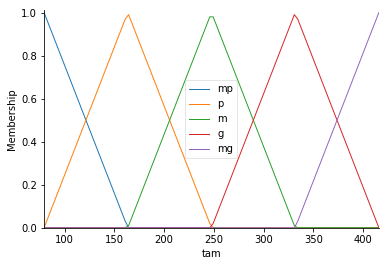

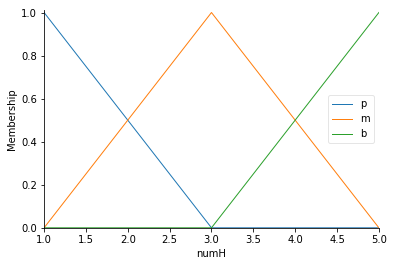

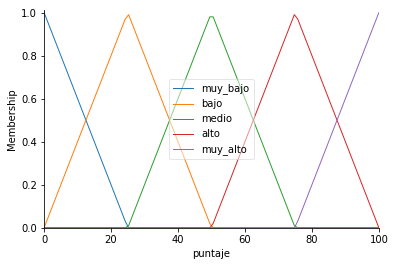

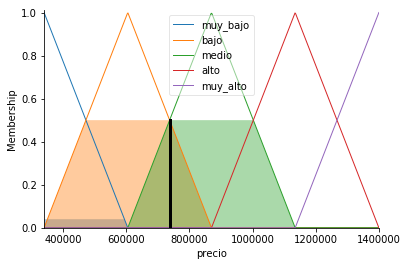

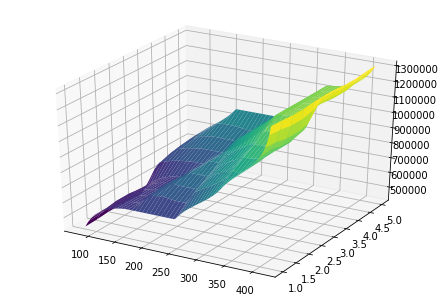

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as fis
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

tam = fis.Antecedent(np.linspace(79.15,416.02,100),'tam')
numH = fis.Antecedent(np.linspace(1,5,11),'numH')

precio = fis.Consequent(np.linspace(339800,1399800,500),'precio')

tam.automf(names=['mp','p','m','g','mg'])
tam.view()

numH.automf(names=['p','m','b'])
numH.view()

precio.automf(names=['muy_bajo','bajo','medio','alto','muy_alto'])
puntaje.view()

r1 = fis.Rule(tam['mp'] & numH['p'],precio['muy_bajo'])
r2 = fis.Rule(tam['mp'] & numH['m'],precio['muy_bajo'])
r3 = fis.Rule(tam['mp'] & numH['b'],precio['bajo'])
r4 = fis.Rule(tam['p'] & numH['p'],precio['bajo'])
r5 = fis.Rule(tam['p'] & numH['m'],precio['bajo'])
r6 = fis.Rule(tam['p'] & numH['b'],precio['medio'])
r7 = fis.Rule(tam['m'] & numH['p'],precio['bajo'])
r8 = fis.Rule(tam['m'] & numH['m'],precio['medio'])
r9 = fis.Rule(tam['m'] & numH['b'],precio['medio'])
r10 = fis.Rule(tam['g'] & numH['p'],precio['medio'])
r11 = fis.Rule(tam['g'] & numH['m'],precio['alto'])
r12 = fis.Rule(tam['g'] & numH['b'],precio['alto'])
r13 = fis.Rule(tam['mg'] & numH['p'],precio['muy_alto'])
r14 = fis.Rule(tam['mg'] & numH['m'],precio['muy_alto'])
r15 = fis.Rule(tam['mg'] & numH['b'],precio['muy_alto'])


reglas = fis.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])
precio_fis = fis.ControlSystemSimulation(reglas)

precio_fis.input['tam'] = 160
precio_fis.input['numH'] = 4

precio_fis.compute()

print(precio_fis.output['precio'])
precio.view(sim=precio_fis)

a = tam.universe
b = numH.universe

S = np.zeros((a.size,b.size))

for i in range(a.size):
  for j in range(b.size):
    precio_fis.input['tam'] = a[i]
    precio_fis.input['numH'] = b[j]

    precio_fis.compute()

    S[i][j] = precio_fis.output['precio']

x,y = np.meshgrid(a,b)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x,y,S.transpose(),cmap=cm.viridis)

Saving precioCasas.csv to precioCasas (3).csv
Para la casa 1 el precio es: 600926084.2023716
Para la casa 2 el precio es: 782912612.3178756
Para la casa 3 el precio es: 584676476.86315
Para la casa 4 el precio es: 984849972.479459
Para la casa 5 el precio es: 737301917.3519337
Para la casa 6 el precio es: 597109586.0389494
Para la casa 7 el precio es: 588127068.9859922
Para la casa 8 el precio es: 583026739.9173552
Para la casa 9 el precio es: 594169519.3622607
Para la casa 10 el precio es: 737301917.3519337
Para la casa 11 el precio es: 685539003.6640905
Para la casa 12 el precio es: 653642882.2545398
Para la casa 13 el precio es: 1311464542.452294
Para la casa 14 el precio es: 567555931.654423
Para la casa 15 el precio es: 749591116.9518448
Para la casa 16 el precio es: 574808612.4335941
Para la casa 17 el precio es: 562165043.2152507
Para la casa 18 el precio es: 840161028.4834679
Para la casa 19 el precio es: 990184378.9052167
Para la casa 20 el precio es: 608699368.8924811
Para la

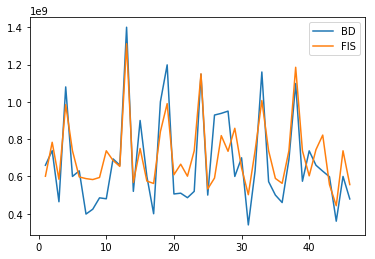

In [0]:
from google.colab import files
import io
import pandas as pd

carga = files.upload()
data = io.BytesIO(carga['precioCasas.csv'])

df = pd.read_csv(data)

bd = list()
fis = list()

for i, fila in df.iterrows():
  precio_fis.input['tam'] = fila[0]
  precio_fis.input['numH'] = fila[1]
  bd.append(fila[2])

  precio_fis.compute()
  fis.append(precio_fis.output['precio']*1000)
  
  print("Para la casa " + str(i+1) + " el precio es: " + str(fis[i]))
  
plt.plot(np.arange(1,47),bd,np.arange(1,47),fis)
plt.legend(('BD','FIS'))

Saving riesgoC.csv to riesgoC (11).csv
[8737000 4251667]


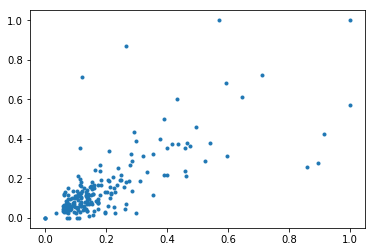

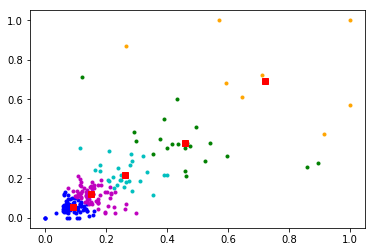

In [0]:
from google.colab import files
import io
import pandas as pd

carga = files.upload()
data = io.BytesIO(carga['riesgoC.csv'])

df = pd.read_csv(data)

colores = ['b','orange','g','c','m','y']

datos = df.values


maxi = np.amax(datos,axis=0)
print(maxi)
datos = datos/maxi
datos = datos.transpose()

plt.figure()
plt.plot(datos[0][:],datos[1][:],'.')

nc = 5

cnt,u,u0,d,jm,p,fpc = fuzz.cluster.cmeans(datos,nc,2,error=0.005,maxiter=100,init=None)
cmp = np.argmax(u,axis=0)

plt.figure()
for j in range(nc):
  plt.plot(datos[0][cmp==j],datos[1][cmp==j],'.',color=colores[j])
  
for pt in cnt:
  plt.plot(pt[0],pt[1],'rs')
